##Week 1 Assignment

In [20]:
import cvxpy as cp
import numpy as np

### Problem 1: Supply Chain Optimization under Demand Uncertainty ###

In [21]:
demand = np.array([255, 302, 270, 317, 285, 332, 300, 347, 315, 362, 330, 262, 309, 277])
probability = np.array([0.03, 0.15, 0.04, 0.1, 0.05, 0.05, 0.09, 0.01, 0.09, 0.03, 0.2, 0.07, 0.05, 0.04])

supply = cp.Variable()

# Expected cost: Weighted absolute difference between supply and demand
expected_cost = cp.sum(cp.multiply(probability, cp.abs(supply - demand)))

# Constraints
constraints = [supply >= 120, supply <= 330]

# Solve problem
problem = cp.Problem(cp.Minimize(expected_cost), constraints)
problem.solve()

print("Optimal Supply:", int(np.round(supply.value, 0)), "Electronic Units")

Optimal Supply: 309 Electronic Units


### Problem 2: Healthcare Resource Allocation with Uncertain Demand ###

In [22]:
arrivals = np.array([25, 20, 30, 50, 27, 39, 42, 29, 35, 42])
arrival_probabilities = np.array([0.1, 0.1, 0.08, 0.15, 0.09, 0.05, 0.1, 0.1, 0.13, 0.1])

beds = cp.Variable()

# Expected cost: Weighted absolute deviation
expected_cost = cp.sum(cp.multiply(arrival_probabilities, cp.abs(beds - arrivals)))

# Constraints
constraints = [beds >= 17, beds <= 55]

# Solve problem
problem = cp.Problem(cp.Minimize(expected_cost), constraints)
problem.solve()

print("Optimal ICU Bed Allocation:", int(np.round(beds.value, 0)), "ICU Beds")

Optimal ICU Bed Allocation: 35 ICU Beds


##Week 2 Assignment

##Problem 1: Simulating a 1D Random Walk with Step Bias

In [23]:
import matplotlib.pyplot as plt
import random

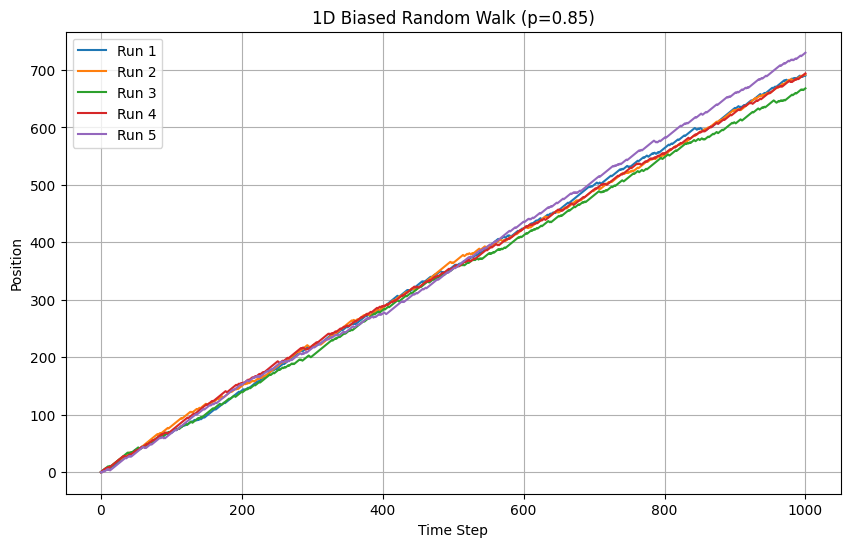

Final positions after 1000 steps: [690, 692, 668, 694, 730]
Mean final position: 694.80
Standard deviation of final positions: 19.94


In [24]:
# Define parameters
num_steps = 1000
num_simulations = 5
p = 0.85  # Probability of moving right

# Store final positions
final_positions = []

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Run the simulation 5 times
for i in range(num_simulations):
    position = 0
    positions = [position]  # Track positions over time

    for _ in range(num_steps):
        step = 1 if np.random.rand() < p else -1  # Decide step based on probability
        position += step
        positions.append(position)

    final_positions.append(position)  # Store the final position
    plt.plot(range(num_steps + 1), positions, label=f'Run {i+1}')  # Plot trajectory

# Final calculations
mean_final = np.mean(final_positions)
std_final = np.std(final_positions)

# Plot formatting
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Biased Random Walk (p=0.85)")
plt.legend()
plt.grid(True)
plt.show()

# Print final statistics
print(f"Final positions after {num_steps} steps: {final_positions}")
print(f"Mean final position: {mean_final:.2f}")
print(f"Standard deviation of final positions: {std_final:.2f}")


##Problem 2: Comparing 1D Random Walks with and without Drift


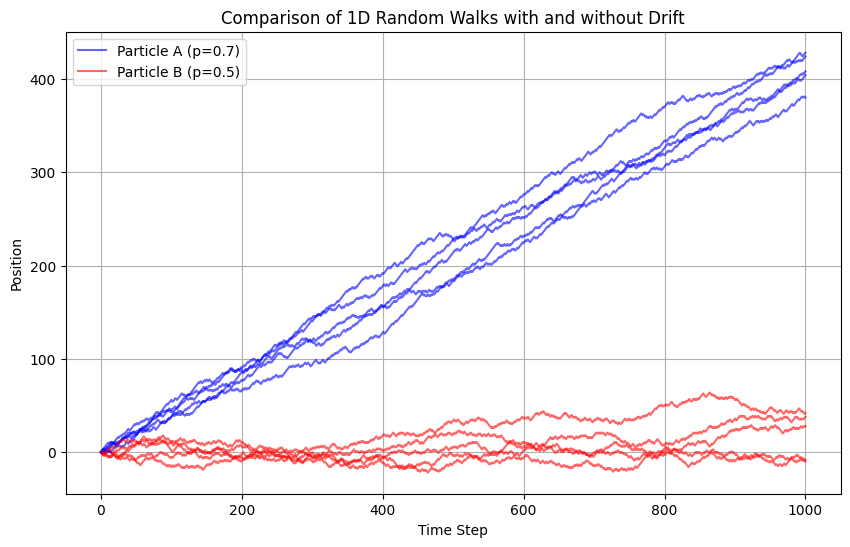

Particle A (p=0.7) - Mean Final Position: 408.80, Std Dev: 17.05
Particle B (p=0.5) - Mean Final Position: 18.00, Std Dev: 22.52


In [25]:
# Define parameters
num_steps = 1000
num_simulations = 5  # Running multiple simulations
p_A = 0.7  # Particle A (with drift)
p_B = 0.5  # Particle B (without drift)

# Store final positions
final_positions_A = []
final_positions_B = []

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Run simulations for both particles
for i in range(num_simulations):
    pos_A, pos_B = 0, 0
    positions_A, positions_B = [pos_A], [pos_B]

    for _ in range(num_steps):
        step_A = 1 if np.random.rand() < p_A else -1
        step_B = 1 if np.random.rand() < p_B else -1
        pos_A += step_A
        pos_B += step_B
        positions_A.append(pos_A)
        positions_B.append(pos_B)

    final_positions_A.append(pos_A)
    final_positions_B.append(pos_B)

    plt.plot(range(num_steps + 1), positions_A, label=f'Particle A - Run {i+1}', alpha=0.6, color='blue')
    plt.plot(range(num_steps + 1), positions_B, label=f'Particle B - Run {i+1}', alpha=0.6, color='red')

# Compute statistics
mean_A, std_A = np.mean(final_positions_A), np.std(final_positions_A)
mean_B, std_B = np.mean(final_positions_B), np.std(final_positions_B)

# Plot formatting
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Comparison of 1D Random Walks with and without Drift")
plt.legend(["Particle A (p=0.7)", "Particle B (p=0.5)"])
plt.grid(True)
plt.show()

# Print final statistics
print(f"Particle A (p=0.7) - Mean Final Position: {mean_A:.2f}, Std Dev: {std_A:.2f}")
print(f"Particle B (p=0.5) - Mean Final Position: {mean_B:.2f}, Std Dev: {std_B:.2f}")


##Problem 3: Simulating a 2D Random Walk (Unbiased)

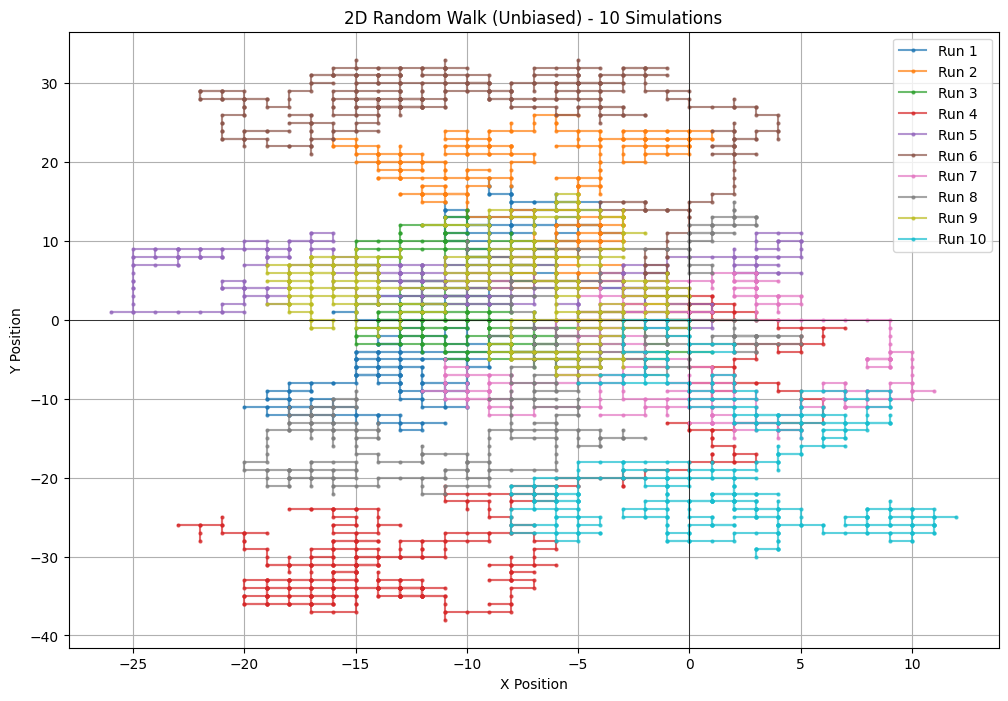

Final positions: [(-16, -8), (-5, 17), (-7, 5), (-22, -28), (5, 11), (-7, 31), (-4, -12), (3, 13), (-13, 9), (9, -25)]
Mean distance from origin after 500 steps: 19.21
Standard deviation of distances: 8.59


In [26]:
# Define parameters
num_steps = 500
num_simulations = 10  # Running 10 simulations
directions = [(0,1), (0,-1), (1,0), (-1,0)]  # Up, Down, Right, Left

# Store final distances
final_positions = []
final_distances = []

plt.figure(figsize=(12, 8))  # Create a figure for the plot

# Run simulations
for i in range(num_simulations):
    x, y = 0, 0  # Starting position
    x_positions, y_positions = [x], [y]  # Track path

    for _ in range(num_steps):
        dx, dy = directions[np.random.randint(4)]  # Choose a random direction
        x += dx
        y += dy
        x_positions.append(x)
        y_positions.append(y)

    final_positions.append((x, y))
    distance = np.sqrt(x**2 + y**2)  # Compute final distance from origin
    final_distances.append(distance)

    # Plot each path with a different color
    plt.plot(x_positions, y_positions, marker="o", markersize=2, alpha=0.7, label=f"Run {i+1}")

# Calculate statistics
mean_distance = np.mean(final_distances)
std_distance = np.std(final_distances)

# Plot formatting
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("2D Random Walk (Unbiased) - 10 Simulations")
plt.axhline(0, color='black', linewidth=0.5)  # Add x-axis
plt.axvline(0, color='black', linewidth=0.5)  # Add y-axis
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Final positions: {final_positions}")
print(f"Mean distance from origin after {num_steps} steps: {mean_distance:.2f}")
print(f"Standard deviation of distances: {std_distance:.2f}")


##Interpretetion

The mosquito's final positions vary significantly across different runs, indicating that there is no preferred direction due to the unbiased movement.
Each run results in a unique ending point, spread in different directions around the origin.

##Problem 4: Comparing 2D Random Walks with Bias vs No Bias

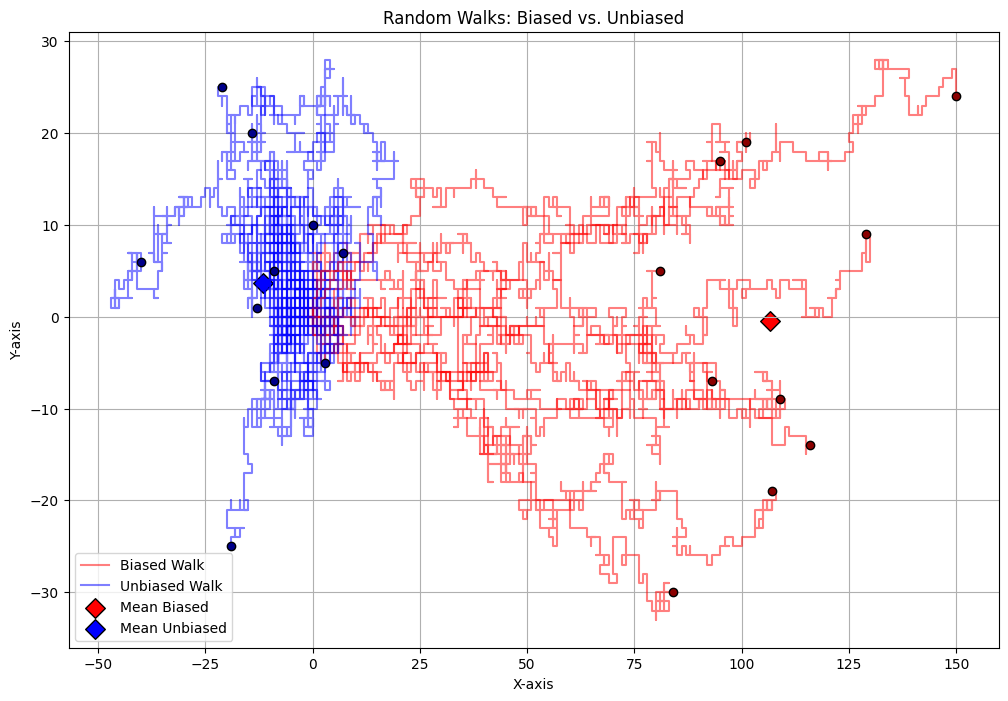

Biased Random Walk:
-------------------
Final Distances: ['89.20', '96.51', '108.67', '129.31', '109.37', '81.15', '116.84', '102.77', '93.26', '151.91']
Average Distance from Origin: 107.90
Standard Deviation: 19.78

Unbiased Random Walk:
---------------------
Final Distances: ['5.83', '10.00', '32.65', '13.04', '9.90', '11.40', '10.30', '31.40', '40.45', '24.41']
Average Distance from Origin: 18.94
Standard Deviation: 11.56


In [27]:
def random_walk(steps, probabilities):
    x, y = 0, 0
    positions = [(x, y)]

    for _ in range(steps):
        move = np.random.choice(['E', 'W', 'N', 'S'], p=probabilities)
        if move == 'E':   # move east
            x += 1
        elif move == 'W': # move west
            x -= 1
        elif move == 'N': # move north
            y += 1
        elif move == 'S': # move south
            y -= 1
        positions.append((x, y))

    return positions

def distance_from_origin(position):
    """Calculate Euclidean distance from the origin."""
    x, y = position
    return np.sqrt(x**2 + y**2)

# ------------------------ Simulation Parameters ------------------------ #
steps_per_walk = 500
trials = 10

# Define probabilities for the walks.
biased_prob = [0.4, 0.2, 0.2, 0.2]
unbiased_prob = [0.25, 0.25, 0.25, 0.25]

# ------------------------ Data Storage ------------------------ #
biased_final_positions = []
unbiased_final_positions = []
biased_distances = []
unbiased_distances = []

# Set up the plot
plt.figure(figsize=(12, 8))
plt.title('Random Walks: Biased vs. Unbiased')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)

# ------------------------ Simulation Loop ------------------------ #
for trial in range(trials):
    biased_positions = random_walk(steps_per_walk, biased_prob)
    unbiased_positions = random_walk(steps_per_walk, unbiased_prob)

    biased_final = biased_positions[-1]
    unbiased_final = unbiased_positions[-1]

    biased_final_positions.append(biased_final)
    unbiased_final_positions.append(unbiased_final)
    biased_distances.append(distance_from_origin(biased_final))
    unbiased_distances.append(distance_from_origin(unbiased_final))

    biased_x, biased_y = zip(*biased_positions)
    unbiased_x, unbiased_y = zip(*unbiased_positions)

    plt.plot(biased_x, biased_y, color='red', alpha=0.5, label='Biased Walk' if trial == 0 else "")
    plt.plot(unbiased_x, unbiased_y, color='blue', alpha=0.5, label='Unbiased Walk' if trial == 0 else "")

    plt.scatter(biased_final[0], biased_final[1], facecolors='darkred', edgecolors='black', zorder=5)
    plt.scatter(unbiased_final[0], unbiased_final[1], facecolors='darkblue', edgecolors='black', zorder=5)

# ------------------------ Plot Mean Final Positions ------------------------ #
mean_biased_x = np.mean([pos[0] for pos in biased_final_positions])
mean_biased_y = np.mean([pos[1] for pos in biased_final_positions])
mean_unbiased_x = np.mean([pos[0] for pos in unbiased_final_positions])
mean_unbiased_y = np.mean([pos[1] for pos in unbiased_final_positions])

plt.scatter(mean_biased_x, mean_biased_y, color='red', edgecolors='black', marker='D', s=100, label='Mean Biased')
plt.scatter(mean_unbiased_x, mean_unbiased_y, color='blue', edgecolors='black', marker='D', s=100, label='Mean Unbiased')

plt.legend()
plt.show()

# ------------------------ Analysis ------------------------ #
biased_avg = np.mean(biased_distances)
biased_std = np.std(biased_distances)
unbiased_avg = np.mean(unbiased_distances)
unbiased_std = np.std(unbiased_distances)

print("Biased Random Walk:")
print("-------------------")
print(f"Final Distances: {[f'{d:.2f}' for d in biased_distances]}")
print(f"Average Distance from Origin: {biased_avg:.2f}")
print(f"Standard Deviation: {biased_std:.2f}\n")

print("Unbiased Random Walk:")
print("---------------------")
print(f"Final Distances: {[f'{d:.2f}' for d in unbiased_distances]}")
print(f"Average Distance from Origin: {unbiased_avg:.2f}")
print(f"Standard Deviation: {unbiased_std:.2f}")



##Results Interpretation:
###The Biased Walk Drifts East.

Since there's a 40% chance of moving right, the biased walk moves further in the positive X direction on average.
###Higher Mean Distance for Biased Walk.

Since it moves more often in one direction, the biased walk is further from the origin than the unbiased walk.
###Impact on Standard Deviation.

The biased walk might have lower variation in distance since it consistently drifts east.
The unbiased walk has more randomness, so its standard deviation is larger.
###Real-World Applications:

Wind or ocean currents: Objects in water drift with the current.
Stock market trends: A biased market has a general upward/downward trend despite fluctuations.